In [ ]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [ ]:
%autosave 0
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook

# Approximate Inference



For many interesting models the evidence  

$$
p(\mathcal{D}|\mathcal{M}_i) = \int p(\mathcal{D}|\mathcal{M}_i, \theta) p(\theta| \mathcal{M}_i) d\theta
$$

and hence the posterior are intractable:

- The integral has no closed-form
- The dimensionality is so big that numerical integration is not feasible

We resort to stochastic or deterministic approximations

- MCMC is computationally demanding but can be exact
- VI scales better but is not exact

# Laplace Approximation


Propose a function of $\theta \in \mathbb{R}^K$

$$
g(\theta) = \log p(\mathcal{D}| \theta) p(\theta)
$$

Do a second order Taylor expansion around $\theta= \hat \theta_{\text{map}}$

$$
\begin{align}
g(\theta) \approx g(\hat \theta_{\text{map}}) &+ (\theta - \hat \theta_{\text{map}})^T \frac{dg}{d\theta}\bigg \rvert_{\theta=\hat \theta_{\text{map}}} \nonumber \\
&+ \frac{1}{2} (\theta - \hat \theta_{\text{map}})^T \frac{d^2 g}{d\theta^2} \bigg \rvert_{\theta=\hat \theta_{\text{map}}} (\theta - \hat \theta_{\text{map}})
\end{align}
$$

- By definition the first derivative evaluated at $\hat \theta_{\text{map}}$ is zero 
- We call the negative Hessian evaluated at $\hat \theta_{\text{map}}$: $\Sigma^{-1} = -\frac{d^2 g}{d\theta^2} (\hat \theta_{\text{map}})$ 

If we plug the approximation in the evidence we can solve the integral

$$
p(\mathcal{D}) \approx  e^{g(\hat \theta_{\text{map}})} \int e^{-  \frac{1}{2} (\theta - \hat \theta_{\text{map}})^T \Sigma^{-1} (\theta - \hat \theta_{\text{map}})} d\theta = e^{g(\hat \theta_{\text{map}})} (2\pi)^{K/2} |\Sigma|^{1/2}
$$

And the posterior

$$
\begin{align}
p(\theta| \mathcal{D}) &= \frac{p(\mathcal{D}|\theta) p(\theta) }{p(\mathcal{D})} \nonumber \\
&\approx \frac{1}{(2\pi)^{K/2} |\Sigma|^{1/2}} e^{-  \frac{1}{2} (\theta - \hat \theta_{\text{map}})^T \Sigma^{-1} (\theta - \hat \theta_{\text{map}})} 
\end{align}
$$

> Laplace method approximates the posterior by a **Multivariate Gaussian** centered in the MAP

Two steps
1. Find the mode (MAP)
1. Evaluate the Hessian at the mode

Note that
- We didn't assume any distribution for the prior or likelihood
- We require that $g$ is continuous and differentiable on $\theta$ 
- We also require that the negative Hessian of $g$ on the MAP is a proper covariance

#### Evidence decomposition 

Using Laplace approximation the log evidence can be decomposed as

$$
\begin{align}
\log p(\mathcal{D}|\mathcal{M}_i) &\approx g(\hat \theta_{\text{map}}) + \log (2\pi)^{K/2} |\Sigma|^{1/2} \nonumber \\
&=\log p(\mathcal{D}|\mathcal{M}_i, \hat \theta_{\text{map}}) + \log p(\hat \theta_{\text{map}}| \mathcal{M}_i) + \frac{K}{2} \log(2\pi) + \frac{1}{2} \log | \Sigma | \nonumber 
\end{align}
$$

> The log evidence is approximated by the best likelihood fit plus the Occam's factor

The Occam's factor depends on the
- log pdf of $\theta$
- number of parameters $K$
- second derivative of the posterior (model uncertainty)


> If the prior is very broad and $N$ is very large we recover the **Bayesian Information Criterion** (BIC) (Proof?)

# Variational Inference (VI)

We want the posterior

$$
p(\theta|\mathcal{D}) = \frac{p(\mathcal{D}|\theta) p(\theta)}{p(\mathcal{D})}
$$

but it may be intractable

In VI a simpler (tractable) posterior distribution is proposed

$$
q_\nu(\theta)
$$

> We approximate $p(\theta|\mathcal{D})$ with $q_\nu(\theta)$

$q_\eta(\theta)$ represents a family of distributions parametrized by $\eta$

> **Optimization problem:** Find $\nu$ that makes $q$ most similar to $p$

We can write this as a KL divergence

$$
\hat \nu =  \text{arg}\min_\nu D_{\text{KL}}[q_\nu(\theta) || p(\theta|\mathcal{D})] = \int q_\nu(\theta) \log \frac{q_\nu(\theta)}{p(\theta|\mathcal{D})} d\theta
$$

This is still intractable 

To continue we use Bayes Theorem on the posterior and move the evidence out from the integral

$$
D_{\text{KL}}[q_\nu(\theta) || p(\theta|\mathcal{D})] = \log p(\mathcal{D}) + \int q_\nu(\theta) \log \frac{q_\nu(\theta)}{p(\mathcal{D}|\theta) p (\theta)} d\theta
$$

> If we are minimizing with respect to $\nu$ we can ignore the evidence

The KL divergence is 
- non-negative
- zero only if $q_\nu(\theta) \equiv p(\theta|\mathcal{D})$

Using the non-negativity we find a lower bound for the evidence

$$
\log p(\mathcal{D}) \geq  \mathcal{L}(\nu) = - \int q_\nu(\theta) \log \frac{q_\nu(\theta)}{p(\mathcal{D}|\theta) p (\theta)} d\theta
$$

> $\mathcal{L}(\nu)$ is called the **Evidence Lower BOund** (ELBO)

Minimizing the KL between $q$ and $p$ is equivalent to maximizing the ELBO wrt $q$

$$
\hat \nu = \text{arg}\max_\nu \mathcal{L}(\nu)
$$

- We can use $q_{\hat \nu}(\theta)$ as a drop-in replacement for $p(\theta|\mathcal{D})$
- The ELBO is tractable for simple, parametric $q$
- The ELBO can only be tight if $p$ is within the family of $q$


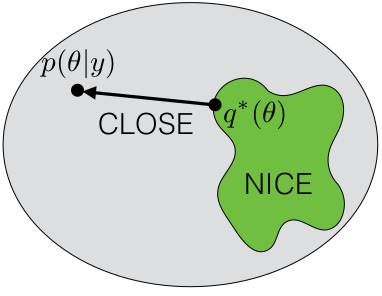


¿Why is it called variational?

- Functional: Function of functions. [Calculus of variations](https://en.wikipedia.org/wiki/Calculus_of_variations): Derivatives of functionals
- [Variational Free Energy](https://en.wikipedia.org/wiki/Thermodynamic_free_energy): $-\mathcal{L}(\nu)$ 


### Another way to "obtain" the ELBO

Using Jensen's inequality on the log evidence

$$
\begin{align}
\log p(\mathcal{D}) &=  \log \mathbb{E}_{\theta\sim p(\theta)} \left[p(\mathcal{D}|\theta)\right]\nonumber \\
&=  \log \mathbb{E}_{\theta\sim q_\nu(\theta)} \left[p(\mathcal{D}|\theta)\frac{p(\theta)}{q_\nu(\theta)}\right]\nonumber \\
&\geq  \mathbb{E}_{\theta\sim q_\nu(\theta)} \left[\log p(\mathcal{D}|\theta)\frac{p(\theta)}{q_\nu(\theta)}\right] =- \int q_\nu(\theta) \log \frac{q_\nu(\theta)}{p(\mathcal{D}|\theta) p (\theta)} d\theta \nonumber 
\end{align}
$$

### Fully-factorized posterior

A simple (tractable) posterior

$$
q_\nu(\theta) = \prod_{i=1}^K q_{\nu}(\theta_i)
$$

- no correlation between factors
- this is known as the Mean-field VI or Mean-field Theory (physics)

Using this factorized posterior the ELBO
$$
\mathcal{L}(\nu) =  \int q_{\nu_i}(\theta_i) \log \left [ p(\mathcal{D}|\theta)p(\theta) \prod_{j\neq i} q_{\nu_j}(\theta_j) d\theta_j \right ] d\theta_i - \sum_i \int q_{\nu_i}(\theta_i) \log q_{\nu_i}(\theta_i)  d\theta_i
$$

We can  keep all $\theta$ but $i$ fixed and update $i$ iteratively

$$
\begin{align}
\mathcal{L}(\nu_i) &=  \int q_{\nu_i}(\theta_i) \mathbb{E}_{\prod q_{i\neq j}} \left[ p(\mathcal{D}| \theta)p(\theta) \right ] d\theta_i - \int q_{\nu_i}(\theta_i) \log q_{\nu_i}(\theta_i)  d\theta_i + \text{Constant}  \nonumber \\
&  = - \int q_{\nu_i}(\theta_i) \log \frac{ q_{\nu_i}(\theta_i)}{\mathbb{E}_{\prod q_{i\neq j}} \left[ p(\mathcal{D}| \theta)p(\theta) \right ]} d\theta_i + \text{Constant} \nonumber
\end{align}
$$

> Maximizing the ELBO es equivalent to minimizing the KL between $q_{\nu_i}(\theta_i)$ and $\mathbb{E}_{\prod q_{i\neq j}} \left[ p(\mathcal{D}| \theta)p(\theta) \right ]$

The solution is given by

$$
\log q_i(\nu_i) =  \mathbb{E}_{\prod q_{i\neq j}} \left[ p(\mathcal{D}| \theta)p(\theta) \right ] + \text{Constant}
$$
> Guaranteed convergence (convex on factors $q_i$)

## Example: Approximating a Gaussian

A full univariate Gaussian model would be

$$
\begin{align}
p(x, \theta) &= p(x|\theta) p(\theta) \nonumber \\
& = p(x|\mu, \sigma^2) p(\mu, \sigma^2) \nonumber \\
& = p(x|\mu, \sigma^2) p(\mu|\sigma^2) p(\sigma^2) \nonumber \\
\end{align}
$$ 

A full conjugate model would have Normal $p(\mu|\sigma^2) $ and Inverse Gamma $p(\sigma^2)$

Approximating with a fully-factorized assumes

$$
q(\theta) = q(\mu)q(\sigma^2)
$$

In [ ]:
import torch
np.random.seed(100)
data = torch.from_numpy(np.random.randn(10).astype('float32'))

In [ ]:
display(data.mean())
display(data.std())

In [ ]:
import pyro
from pyro.distributions import Normal, LogNormal

from pyro.infer.mcmc.api import MCMC
from pyro.infer.mcmc import NUTS

def model(x):
    s = pyro.sample("sigma", LogNormal(torch.tensor(0.), torch.tensor(10.)))
    mu = pyro.sample("mu", Normal(torch.tensor(0.), torch.tensor(10.))) 
    with pyro.plate('data_plate', size=10):
        pyro.sample("likelihood", Normal(mu, s), obs=x)

nuts_kernel = NUTS(model, adapt_step_size=True)
sampler = MCMC(nuts_kernel, num_chains=1, num_samples=10000, warmup_steps=1000)
sampler.run(data)

In [ ]:
display(sampler.diagnostics())
samples = sampler.get_samples()
mu_plot = samples['mu'].detach().numpy()
s_plot = samples['sigma'].detach().numpy()

import corner
figure = corner.corner(np.stack((mu_plot, s_plot)).T, 
                       labels=[r"$\mu$", r"$\sigma$"], bins=20,
                       quantiles=[0.16, 0.5, 0.84], range=[(-2, 2), (0.5, 2.5)],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [ ]:
#from pyro.distributions import HalfNormal, HalfCauchy, Chi2, InverseGamma # If any of these is used instead of lognormal variance is HUGE
from torch.distributions import constraints

def guide(x):
    s_loc = pyro.param("s_loc", torch.tensor(0.))
    s_scale = pyro.param("s_scale", torch.tensor(10.), constraint=constraints.positive)
    s = pyro.sample("sigma", LogNormal(s_loc, s_scale))    
    mu_loc = pyro.param("mu_loc", torch.tensor(0.))
    mu_scale = pyro.param("mu_scale", torch.tensor(10.), constraint=constraints.positive)    
    mu = pyro.sample("mu", Normal(mu_loc, mu_scale))  
    
pyro.clear_param_store()
pyro.enable_validation(True)
svi = pyro.infer.SVI(model=model, guide=guide,
                     optim=pyro.optim.ClippedAdam({"lr": 0.01}),
                     loss=pyro.infer.Trace_ELBO(num_particles=1), num_samples=10)

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(8, 2), tight_layout=True, dpi=120)
lines = [ax_.plot([], [])[0] for ax_ in ax]
param_names = ["ELBO", "mu_loc", "mu_scale", "s_loc", "s_scale"]
param_evolution = {}
for name in param_names:
    param_evolution[name] = []
    
for ax_, name in zip(ax, param_names):
    ax_.set_title(name)

for k in tqdm_notebook(range(2000)):
    param_evolution["ELBO"].append(svi.step(data))
    #display(pyro.get_param_store().keys())

    for name in param_names[1:]:
        param_evolution[name].append(pyro.param(name).item())    

    if np.mod(k, 100) == 0:
        for i, name in enumerate(param_names):
            lines[i].set_ydata(param_evolution[name][:k])
        for line in lines:
            line.set_xdata(range(k))
        for ax_ in ax.ravel():
            ax_.relim()
            ax_.autoscale_view()
        fig.canvas.draw()

In [ ]:
#from pyro.infer import EmpiricalMarginal
#posterior = svi.run(data)
#mu_plot = EmpiricalMarginal(posterior, "mu")._get_samples_and_weights()[0].detach().numpy()
#s_plot = EmpiricalMarginal(posterior, "sigma")._get_samples_and_weights()[0].detach().numpy()

mu_plot = Normal(pyro.param("mu_loc"), pyro.param("mu_scale")).rsample((100000,)).detach().numpy()
s_plot = LogNormal(pyro.param("s_loc"), pyro.param("s_scale")).rsample((100000,)).detach().numpy()


figure = corner.corner(np.stack((mu_plot, s_plot)).T, 
                       labels=[r"$\mu$", r"$\sigma$"], bins=20,
                       quantiles=[0.16, 0.5, 0.84], range=[(-2, 2), (0.5, 2.5)],
                       show_titles=True, title_kwargs={"fontsize": 12})

## More attention on the ELBO 

$$
\begin{align}
\mathcal{L}(\eta) &= - \int q_\eta(\theta) \log \frac{q_\eta(\theta)}{p(\mathcal{D}|\theta) p (\theta)} d\theta \nonumber \\
&= - \int q_\eta(\theta) \log \frac{q_\eta(\theta)}{ p (\theta)} d\theta + \int q_\eta(\theta) \log p(\mathcal{D}|\theta) d\theta \nonumber \\
&= - D_{KL}[q_\eta(\theta) || p(\theta)] + \mathbb{E}_{\theta \sim q_\eta(\theta)} \left[\log p(\mathcal{D}|\theta)\right]\nonumber 
\end{align}
$$

> Maximizing the ELBO is equivalent to:
- Maximize the log likelihood when sampling from the approximate posterior
- Minimize the KL between the approximate posterior and prior

# Self-study

- [Chapter 28 of D. Barber's book](http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.Online)
    - 28.2 Laplaca Approximation
    - 28.4 Variational Bounding
- David Blei, ["Variational Inference: A review for statisticians"](https://arxiv.org/abs/1601.00670), ["Foundations and innovations"](https://www.youtube.com/watch?v=DaqNNLidswA)
- Tamara Broderick, ["Variational Bayes and beyond: Bayesian inference for big data"](http://www.tamarabroderick.com/tutorial_2018_icml.html)
- https://cedar.buffalo.edu/~srihari/CSE574/Chap10/10.2VariationalInference.pdf